<a href="https://colab.research.google.com/github/rkukjk/Face-and-Eye-Tracking/blob/main/Face_and_Eye_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python==3.4.5.20

     |████████████████████████████████| 25.4 MB 1.7 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [118]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [119]:
myImage = cv2.imread("/content/profilePhoto.png")

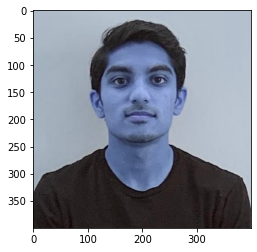

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(myImage)

We are now going to detect my face first. It is always good to go from big to small because doing that will make sure we save computational power and make the process much faster. We can first gray the image.

In [121]:
myGrayImage = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)#make picture gray
faces = face_cascade.detectMultiScale(myGrayImage, 1.3, 5)

In [122]:
faces #this suggests that there is a face starting at coordinate 100,54 and face has dimension of 194x194

array([[100,  54, 194, 194]], dtype=int32)

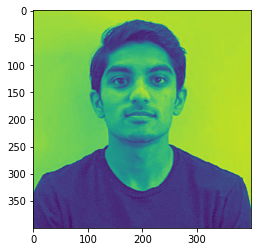

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(myGrayImage)

In [124]:
for (x,y,w,h) in faces:
  cv2.rectangle(myImage, (x,y), (x+w, y+h), (255, 0, 0), 2)

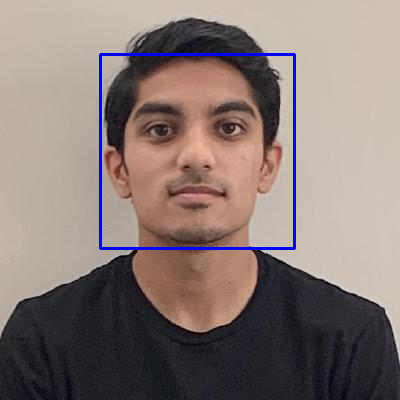

In [125]:
from google.colab.patches import cv2_imshow


cv2_imshow(myImage)

The above image shows my face being detected.

In [126]:
gray_face = myGrayImage[y:y+h, x:x+w]

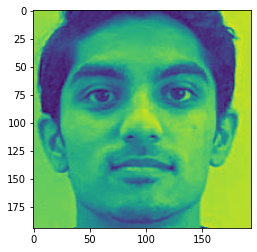

In [127]:
plt.imshow(gray_face) #this is the face that we have detected

In [128]:
face = myImage[y:y+h, x:x+w]

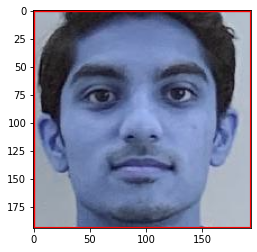

In [129]:
plt.imshow(face) #detected face in original image (non grayscale image)

Now we are going to detect the eyes on the face.

In [130]:
eyes = eye_cascade.detectMultiScale(gray_face)

In [131]:
eyes

array([[106,  52,  43,  43],
       [ 37,  55,  43,  43]], dtype=int32)

In [132]:
for (x,y,w,h) in eyes:
  cv2.rectangle(face, (x,y), (x+w, y+h), (0, 255, 0), 2)

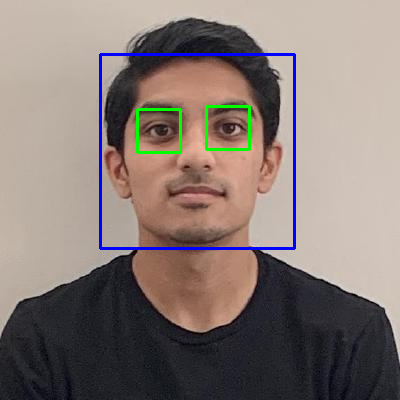

In [133]:
cv2_imshow(myImage)

Now we have detected eyes in my image.